In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip uninstall imgaug -y
!pip install imgaug==0.2.5
!pip uninstall matplotlib -y
!pip install matplotlib==3.4.3

Found existing installation: imgaug 0.2.9
Uninstalling imgaug-0.2.9:
  Successfully uninstalled imgaug-0.2.9
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 562 kB 4.2 MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.5-py3-none-any.whl size=561438 sha256=fd9d5a9fd93dbc008c6f484cd7dc0b80306d4dea980f8e67f82dc6bf9e29ca46
  Stored in directory: /root/.cache/pip/wheels/60/dd/38/d1dc2cad2b6a66dc0249261004990bccb0f27985c74ba26e49
Successfully built imgaug
Found existing installation: matplotlib 3.2.2
Uninstalling matplotlib-3.2.2:
  Successfully uninstalled matplotlib-3.2.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.3 MB 5.3 MB/s 


In [3]:
!pip install pyvi
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.5 MB 3.8 MB/s 
     |████████████████████████████████| 965 kB 38.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 36 kB/s 
     |████████████████████████████████| 199 kB 43.6 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=c64a1230c1e55a20ec98c9975cf70577edf3235cae2a6cfd918b69c8dac1bd42
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [1]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import functions as f

spark = SparkSession.builder.appName("ViHSD_MLLib").config("spark.executor.memory","8g").getOrCreate()

In [2]:
import pandas as pd 
import numpy as np 

DATA = '/content/drive/MyDrive/Colab/BigData/vihsd/train.csv'
DEV_DATA = '/content/drive/MyDrive/Colab/BigData/vihsd/dev.csv'
TEST_DATA = '/content/drive/MyDrive/Colab/BigData/vihsd/test.csv'

pd_train = pd.read_csv(DATA)
pd_dev = pd.read_csv(DEV_DATA)
pd_test = pd.read_csv(TEST_DATA)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


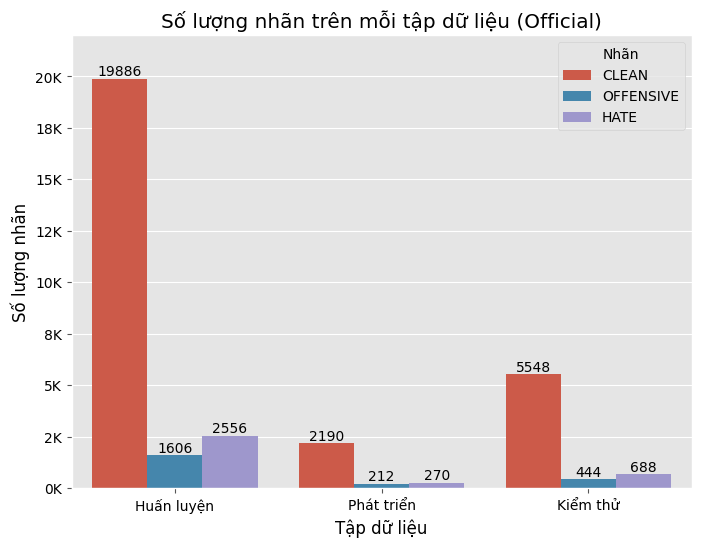

In [3]:
pd_train['set'] = 'Train'
pd_dev['set'] = 'Dev'
pd_test['set'] = 'Test'
df_pd = pd.concat([pd_train, pd_dev, pd_test])
df_pd['counter'] = 1
data = df_pd.groupby(['label_id', 'set']).sum().reset_index().replace({0: 'CLEAN', 1: 'OFFENSIVE', 2: 'HATE'})

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"

figure(figsize=(8, 6), dpi=100)
plt.style.use('ggplot')

g = sns.barplot(x = "set", y = "counter", hue='label_id', data = data, order = ["Train", "Dev", "Test"])

g.set_title('Số lượng nhãn trên mỗi tập dữ liệu (Official)', color='black')
g.set_ylabel("Số lượng nhãn", color='black')
g.set_xlabel("Tập dữ liệu", color='black')
h, l = g.get_legend_handles_labels()
label = ['CLEAN', 'OFFENSIVE', 'HATE']
g.legend(h, label, title="Nhãn")
g.set(ylim = (0, 22000))
ylabels = ['{:,.0f}'.format(x) + 'K' for x in g.get_yticks()/1000]
g.set_yticklabels(ylabels)
for container in g.containers:
    g.bar_label(container, fontsize=10, color='black')
g.set_xticklabels(['Huấn luyện', 'Phát triển', 'Kiểm thử'])
for tick in g.yaxis.get_major_ticks():
    tick.label1.set_color('black')
for tick in g.xaxis.get_major_ticks():
    tick.label1.set_color('black')
plt.show()

In [9]:
data1 = data.copy()
data1['set'].replace({'Dev': 'Train'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator


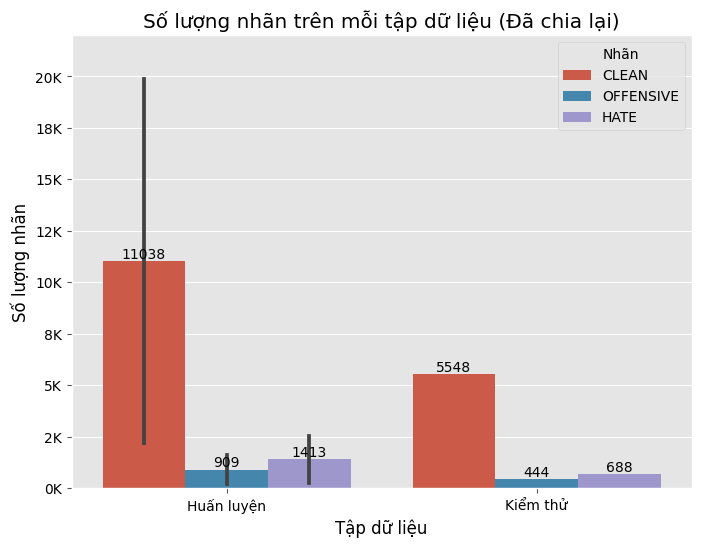

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"

figure(figsize=(8, 6), dpi=100)
plt.style.use('ggplot')

g = sns.barplot(x = "set", y = "counter", hue='label_id', data = data1, order = ["Train", "Test"])

g.set_title('Số lượng nhãn trên mỗi tập dữ liệu (Đã chia lại)', color='black')
g.set_ylabel("Số lượng nhãn", color='black')
g.set_xlabel("Tập dữ liệu", color='black')
h, l = g.get_legend_handles_labels()
label = ['CLEAN', 'OFFENSIVE', 'HATE']
g.legend(h, label, title="Nhãn")
g.set(ylim = (0, 22000))
ylabels = ['{:,.0f}'.format(x) + 'K' for x in g.get_yticks()/1000]
g.set_yticklabels(ylabels)
for container in g.containers:
    g.bar_label(container, fontsize=10, color='black')
g.set_xticklabels(['Huấn luyện', 'Kiểm thử'])
for tick in g.yaxis.get_major_ticks():
    tick.label1.set_color('black')
for tick in g.xaxis.get_major_ticks():
    tick.label1.set_color('black')
plt.show()

In [15]:
pd_train

,free_text,label_id,set
0,Em được làm fan cứng luôn rồi nè ❤️ reaction q...,0,Train
1,Đúng là bọn mắt híp lò xo thụt :))) bên việt n...,2,Train
2,Đậu Văn Cường giờ giống thằng sida hơn à,0,Train
3,CÔN ĐỒ CỤC SÚC VÔ NHÂN TÍNH ĐỀ NGHI VN. NHÀ NƯ...,2,Train
4,Từ lý thuyết đến thực hành là cả 1 câu chuyện ...,0,Train
...,...,...,...
24043,Thả tim cho sự cống hiến của ngài,0,Train
24044,Thua !,0,Train
24045,Ở Việt Nam thì có khánh sky..hải ngoại có trần...,0,Train
24046,"1:22 ai lớp du chu cờ moo, Duyên dáng quá cô ơi",0,Train


In [17]:
DATA = '/content/drive/MyDrive/Colab/BigData/vihsd/train.csv'
DEV_DATA = '/content/drive/MyDrive/Colab/BigData/vihsd/dev.csv'
TEST_DATA = '/content/drive/MyDrive/Colab/BigData/vihsd/test.csv'

pd_train = pd.read_csv(DATA)
pd_dev = pd.read_csv(DEV_DATA)
pd_test = pd.read_csv(TEST_DATA)

In [18]:
import pyspark.sql.types as t

schema = t.StructType(
    [t.StructField("free_text", t.StringType(), True),
     t.StructField("label_id", t.IntegerType(), True)]
)

df_train = spark.createDataFrame(pd_train, schema=schema)
df_dev = spark.createDataFrame(pd_dev, schema=schema)
df_test = spark.createDataFrame(pd_test, schema=schema)
df_train = df_train.union(df_dev)

In [19]:
import re
from pyvi.ViTokenizer import ViTokenizer
from pyspark.ml.linalg import VectorUDT
from pyspark.ml.linalg import Vectors

STOPWORDS = '/content/drive/MyDrive/Colab/BigData/vietnamese-stopwords-dash.txt'
with open(STOPWORDS, "r") as ins:
    stopwords = []
    for line in ins:
        dd = line.strip('\n').strip('\"')
        stopwords.append(dd)
    stopwords = set(stopwords)


def filter_stop_words(train_sentences, stop_words):
    new_sent = [word for word in train_sentences.split()
                if word not in stop_words]
    train_sentences = ' '.join(new_sent)

    return train_sentences


def deEmojify(text):
    regrex_pattern = re.compile(pattern="["
                                u"\U0001F600-\U0001F64F"  # emoticons
                                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                "]+", flags=re.UNICODE)
    return regrex_pattern.sub(r'', text)


def preprocess(text, tokenized=True, lowercased=True):
    text = ViTokenizer.tokenize(text) if tokenized else text
    text = filter_stop_words(text, stopwords)
    text = deEmojify(text)
    text = text.lower() if lowercased else text
    return str(text)


preprocess_udf = f.udf(preprocess, t.StringType())
# array_to_vector = f.udf(lambda a: Vectors.dense(a), VectorUDT())

user_regex = r"(@\w{1,15})"
hashtag_replace_regex = "#(\w{1,})"
url_regex = r"((https?|ftp|file):\/{2,3})+([-\w+&@#/%=~|$?!:,.]*)|(www.)+([-\w+&@#/%=~|$?!:,.]*)"
email_regex = r"[\w.-]+@[\w.-]+\.[a-zA-Z]{1,}"


def pre_process_data(data):
    # Loại bỏ @Mention khỏi comment
    data = (data.withColumn("text_clean", f.regexp_replace(f.col("free_text"), user_regex, ""))
            # Loại bỏ #Hashtag khỏi text
            .withColumn("text_clean", f.regexp_replace(f.col("text_clean"), hashtag_replace_regex, "$1"))
            # Loại bỏ URL khỏi text
            .withColumn("text_clean", f.regexp_replace(f.col("text_clean"), url_regex, ""))
            # Loại bỏ Email khỏi text
            .withColumn("text_clean", f.regexp_replace(f.col("text_clean"), email_regex, ""))
            # Loại bỏ các khoảng trắng thừa trong câu
            .withColumn("text_clean", f.regexp_replace(f.col("text_clean"), " +", " "))
            # Loại vỏ các khoảng trắng đầu và cuối câu
            .withColumn("text_clean", f.trim(f.col("text_clean")))
            # Chuẩn hoá viết thường
            .withColumn("text_clean", f.lower(f.col("text_clean")))
            # Giữ lại các dòng mà đoạn text có nội dung
            .filter(f.col("text_clean") != "")
            # Tiền xử lý dữ liệu
            .withColumn('text_clean', preprocess_udf('text_clean')))

    return data

In [20]:
train_clean = pre_process_data(df_train)
test_clean = pre_process_data(df_test)

# Load model trained

In [ ]:
from pyspark.ml import PipelineModel
model_names = ["logistic_regression", "naive_bayes", "decision_tree", "random_rorest"]
trained_model = PipelineModel.load(f"/content/drive/MyDrive/Colab/BigData/ml_model/{model_names[0]}")
trained_model.transform(test_clean).show()

# Logistic Regression

In [22]:
from pyspark.ml.feature import  Tokenizer
from pyspark.ml.feature import CountVectorizer
from pyspark.ml.feature import  IDF
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression

tokenizer = Tokenizer(inputCol="text_clean", outputCol="words")
count = CountVectorizer(inputCol="words", outputCol="rawFeatures")
idf = IDF(inputCol="rawFeatures", outputCol="features")
lr = LogisticRegression(featuresCol='features', labelCol='label_id')

pipelie = Pipeline(stages=[tokenizer, count, idf, lr])
model = pipelie.fit(train_clean)

In [23]:
model.save('/content/drive/MyDrive/Colab/BigData/ml_model/logistic_regression')

Test set accuracy = 0.8149700598802395
F1 - micro: 0.8149700598802394
F1 - macro: 0.5664422957142876
Accuracy: 0.8149700598802395


<AxesSubplot:>

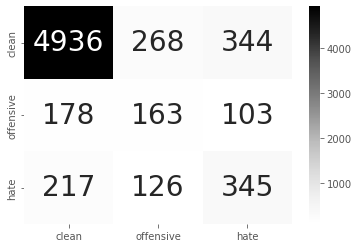

In [24]:
import seaborn as sns
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

predictions = model.transform(test_clean)
evaluator = MulticlassClassificationEvaluator(metricName="accuracy", predictionCol='prediction', labelCol='label_id')
print(f"Test set accuracy = {evaluator.evaluate(predictions)}")

pd_prediction = predictions.select('label_id', 'prediction').toPandas()
y_true = pd_prediction['label_id']
y_pred = pd_prediction['prediction']

f1_micro = f1_score(y_true, y_pred, average='micro')
f1_macro = f1_score(y_true, y_pred, average='macro')
accuracy = accuracy_score(y_true, y_pred)

print(f"F1 - micro: {f1_micro}")
print(f"F1 - macro: {f1_macro}")
print(f"Accuracy: {accuracy}")

cf = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf, index = ["clean", "offensive", "hate"], columns = ["clean", "offensive", "hate"])
sns.heatmap(df_cm, annot=True, cmap="Greys",fmt='g', cbar=True, annot_kws={"size": 28})

# Naive Bayes

In [25]:
from pyspark.ml.feature import  Tokenizer
from pyspark.ml.feature import CountVectorizer
from pyspark.ml.feature import  IDF
from pyspark.ml import Pipeline
from pyspark.ml.classification import NaiveBayes

tokenizer = Tokenizer(inputCol="text_clean", outputCol="words")
count = CountVectorizer(inputCol="words", outputCol="rawFeatures")
idf = IDF(inputCol="rawFeatures", outputCol="features")
nb = NaiveBayes(smoothing=1.0, modelType="multinomial", featuresCol='features', labelCol='label_id')

pipeline = Pipeline(stages=[tokenizer, count, idf, nb])
model = pipeline.fit(train_clean)

In [26]:
model.save('/content/drive/MyDrive/Colab/BigData/ml_model/naive_bayes')

Test set accuracy = 0.7607784431137724
F1 - micro: 0.7607784431137723
F1 - macro: 0.5395903742412519
Accuracy: 0.7607784431137724


<AxesSubplot:>

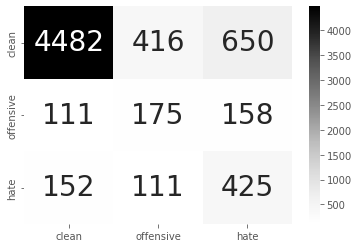

In [27]:
import seaborn as sns
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

predictions = model.transform(test_clean)
evaluator = MulticlassClassificationEvaluator(metricName="accuracy", predictionCol='prediction', labelCol='label_id')
print(f"Test set accuracy = {evaluator.evaluate(predictions)}")

pd_prediction = predictions.select('label_id', 'prediction').toPandas()
y_true = pd_prediction['label_id']
y_pred = pd_prediction['prediction']

f1_micro = f1_score(y_true, y_pred, average='micro')
f1_macro = f1_score(y_true, y_pred, average='macro')
accuracy = accuracy_score(y_true, y_pred)

print(f"F1 - micro: {f1_micro}")
print(f"F1 - macro: {f1_macro}")
print(f"Accuracy: {accuracy}")

cf = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf, index = ["clean", "offensive", "hate"], columns = ["clean", "offensive", "hate"])
sns.heatmap(df_cm, annot=True, cmap="Greys",fmt='g', cbar=True, annot_kws={"size": 28})

# Decision Tree

In [28]:
from pyspark.ml.feature import  Tokenizer
from pyspark.ml.feature import CountVectorizer
from pyspark.ml.feature import  IDF
from pyspark.ml.feature import VectorIndexer
from pyspark.ml import Pipeline
from pyspark.ml.classification import DecisionTreeClassifier

tokenizer = Tokenizer(inputCol="text_clean", outputCol="words")
count = CountVectorizer(inputCol="words", outputCol="rawFeatures")
idf = IDF(inputCol="rawFeatures", outputCol="features")
dt = DecisionTreeClassifier(featuresCol='features', labelCol='label_id')

pipeline = Pipeline(stages=[tokenizer, count, idf, dt])
model = pipeline.fit(train_clean)

In [29]:
model.save('/content/drive/MyDrive/Colab/BigData/ml_model/decision_tree')

Test set accuracy = 0.8440119760479042
F1 - micro: 0.8440119760479041
F1 - macro: 0.43361981580214787
Accuracy: 0.8440119760479042


<AxesSubplot:>

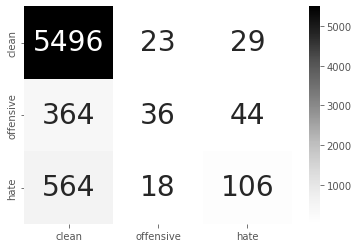

In [30]:
import seaborn as sns
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

predictions = model.transform(test_clean)
evaluator = MulticlassClassificationEvaluator(metricName="accuracy", predictionCol='prediction', labelCol='label_id')
print(f"Test set accuracy = {evaluator.evaluate(predictions)}")

pd_prediction = predictions.select('label_id', 'prediction').toPandas()
y_true = pd_prediction['label_id']
y_pred = pd_prediction['prediction']

f1_micro = f1_score(y_true, y_pred, average='micro')
f1_macro = f1_score(y_true, y_pred, average='macro')
accuracy = accuracy_score(y_true, y_pred)

print(f"F1 - micro: {f1_micro}")
print(f"F1 - macro: {f1_macro}")
print(f"Accuracy: {accuracy}")

cf = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf, index = ["clean", "offensive", "hate"], columns = ["clean", "offensive", "hate"])
sns.heatmap(df_cm, annot=True, cmap="Greys",fmt='g', cbar=True, annot_kws={"size": 28})

# Random Forest

In [31]:
from pyspark.ml.feature import  Tokenizer
from pyspark.ml.feature import CountVectorizer
from pyspark.ml.feature import  IDF
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier

tokenizer = Tokenizer(inputCol="text_clean", outputCol="words")
count = CountVectorizer(inputCol="words", outputCol="rawFeatures")
idf = IDF(inputCol="rawFeatures", outputCol="features")
rf = RandomForestClassifier(featuresCol="features", labelCol="label_id")

pipeline = Pipeline(stages=[tokenizer, count, idf, rf])
model = pipeline.fit(train_clean)

In [32]:
model.save('/content/drive/MyDrive/Colab/BigData/ml_model/random_rorest')

Test set accuracy = 0.8305389221556886
F1 - micro: 0.8305389221556887
F1 - macro: 0.3024751935448697
Accuracy: 0.8305389221556886


<AxesSubplot:>

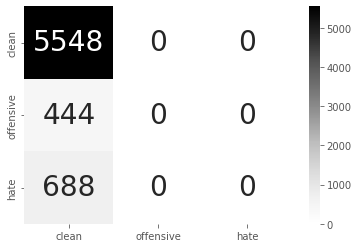

In [33]:
import seaborn as sns
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

predictions = model.transform(test_clean)
evaluator = MulticlassClassificationEvaluator(metricName="accuracy", predictionCol='prediction', labelCol='label_id')
print(f"Test set accuracy = {evaluator.evaluate(predictions)}")

pd_prediction = predictions.select('label_id', 'prediction').toPandas()
y_true = pd_prediction['label_id']
y_pred = pd_prediction['prediction']

f1_micro = f1_score(y_true, y_pred, average='micro')
f1_macro = f1_score(y_true, y_pred, average='macro')
accuracy = accuracy_score(y_true, y_pred)

print(f"F1 - micro: {f1_micro}")
print(f"F1 - macro: {f1_macro}")
print(f"Accuracy: {accuracy}")

cf = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf, index = ["clean", "offensive", "hate"], columns = ["clean", "offensive", "hate"])
sns.heatmap(df_cm, annot=True, cmap="Greys",fmt='g', cbar=True, annot_kws={"size": 28})